In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../results.csv')
df.shape

(45773, 19)

In [68]:
#features and target selection
features = ['team_1', 'team_2', '_map', 'starting_ct', 'rank_1', 'rank_2']
target = ['map_winner']
X = df[features]
y = df[target]

In [74]:
#label encoder
#to go back: le.insverse_transform()
le = preprocessing.LabelEncoder()

X.loc[:, 'team_1'] = le.fit_transform(X['team_1'])
X.loc[:, 'team_2'] = le.fit_transform(X['team_2'])
X.loc[:, '_map'] = le.fit_transform(X['_map'])
X.head()

,team_1,team_2,_map,starting_ct,rank_1,rank_2
0,791,1053,3,2,62,63
1,791,1053,4,2,62,63
2,654,1014,4,1,140,118
3,830,136,4,2,61,38
4,830,136,9,2,61,38


In [75]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [81]:
#training
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
predictions = clf.predict(X_test)
print('Predictions: {}'.format(predictions))

Predictions: [2 2 1 ... 2 1 1]


In [83]:
score = clf.score(X_test, y_test)
print('Score: {:.2f}'.format(score))

Score: 0.59


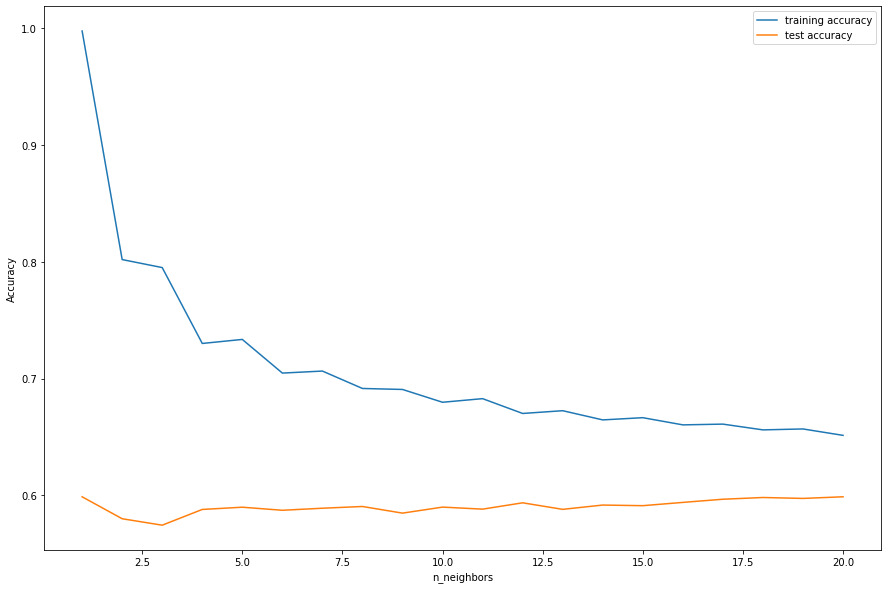

In [80]:
##analyzing

test_acr = []
training_acr = []
neighbors = range(1,21)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train.values.ravel())
    
    training_acr.append(clf.score(X_train, y_train))
    test_acr.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.plot(neighbors, training_acr, label="training accuracy")
plt.plot(neighbors, test_acr, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()